# A1Q4 cmpt423
Hongyi Xue 
hox294 
11187674

a) Assume that a classifier has been trained already (no missing training data), but a prediction has been requested based on an observation that does not include every feature. Give a modified prediction algorithm for this situation.
Hint: Without loss of generality, assume features X0 , . . . Xp , and assume that all features but Xp have been observed (Xp is missing). Derive an formula for P(Y|X0,...Xp−1) and then give the modified algorithm based on your formula.

### Deriving the Naive Bayes classifier:

Applying Bayes Rule:
    $$ P(Y=y_k | X=x ) = \frac{P(X=x|Y=y_k)P(Y=y_k)}{P(X=x)}  $$


We will assume that $X=x$ is an abbreviation for a conjunction of variable-value pairs.  In other words, we may have several observations $(X_0=x_0 \wedge X_1=x_1 \wedge ... X_p=x_p)$, for as many variables as the problem defines.  We'll use $X_i = x_{ij}$ to represent any single feature and its observed value.

Naive Bayes Conditional Independence Assumption: Every feature $X_a$ is conditionally independent of every other feature $X_b$, given $Y$. Mathematically:

 $$P(X=x|Y=y_k) = \prod_{i=1}^{p} P(X_i=x_{ij}|Y=y_k) $$

So the Naive Bayes Classifier is defined as follows:
$$ y(x) = \arg \max_{k} \left\{ \frac{P(Y=y_k) \prod_{i=1}^{p} P(X_i=x_{ij}|Y=y_k)}{P(X=x)} \right\}$$

Since $P(X=x)$ is constant:
$$ y(x) = \arg \max_{k} \left\{ P(Y=y_k) \prod_{i=1}^{p} P(X_i=x_{ij}|Y=y_k) \right\}$$


Now given observation of $$X=x_0 ... x_p$$

$$P(Y|X_0 ... X_p-1) = 
$ P(Y=y_k) \prod_{i=0}^{p-1} $P(X_i=x_{ij}|Y=y_k) $$ for every $y_k$.

b) An alternative technique to handle missing data is to fill in them with a random value for the feature. Try this technique using coins model from Q1, by randomly replacing one of the observations in every sample in the test set, and calculating the difference in accuracy.

In [1]:
import numpy.random as nprand
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import random


change_list = []
acc_list = []


theta_c0 = 0.6
theta_c1 = 1 - theta_c0

theta_f0_c0 = 0.9 #fixed to 0.9 now
theta_f0_c1 = 1 - theta_f0_c0 #fixed now
    
theta_f1_c0 = 1 - theta_f0_c0
theta_f1_c1 = 1 - theta_f0_c1

theta_h1_c0 = 0.3
theta_h0_c0 = 1-theta_h1_c0
theta_h1_c1 = 0.4
theta_h0_c1 = 1-theta_h1_c1

coin_sample = nprand.binomial(1, theta_c1)

N = 1000
Coins = nprand.binomial([1 for i in range (N)], theta_c1)

flip1 = nprand.binomial(1, theta_f1_c0)

flip2 = nprand.binomial(1, theta_f1_c1)

def bin_choose(c, theta_0, theta_1):
    if c == 0:
        return theta_0
    else:
        return theta_1

Flips = np.array([nprand.binomial(1, bin_choose(c, theta_f1_c0, theta_f1_c1)) for c in Coins])
Hats = np.array([nprand.binomial(1, bin_choose(c, theta_h1_c0, theta_h1_c1)) for c in Coins])
    
data = {'Flip' : [x for x in Flips], 
        'Hat'  : [x for x in Hats], 
        'Coin' : Coins}
coindata = pd.DataFrame(data)

Accuracy:  0.71


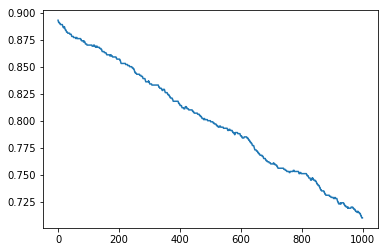

In [2]:
for row in range(0, 1000):
    miss_val = random.randrange(0,2) #randomly pick variables
    if miss_val == 0:  
        coindata.at[row, 'Flip'] = random.randrange(0,2) #set to random value
    elif miss_val == 1:
        coindata.at[row, 'Hat'] = random.randrange(0,2)
    else:
        print("???")
    #coindata.to_csv('coindata.csv')
    #df = pd.read_csv('coindata.csv', index_col=0)
    #df.describe()
    
    clf = BernoulliNB()
    df = coindata
    features = df[['Flip', 'Hat']]
    labels = df['Coin']
    clf.fit(features, labels)

    theta_coin = [math.exp(x) for x in clf.class_log_prior_]
    feature_parameters = np.exp(clf.feature_log_prob_)
    cvs = cross_val_score(clf, features, labels, cv=10)
    change_list.append(row)
    acc_list.append(accuracy_score(labels, clf.predict(features)))

print("Accuracy: ", accuracy_score(labels, clf.predict(features)))
plt.plot(change_list, acc_list)

Comment: We can see that the accuracy drops from around 92% to 70%(with f00=0.9 & f01=0.1). By choosing one of the feature values randomly and change it to a random value, the samples are losing their features when we keep changing more and more samples(from 0 to 1000 samples). Without their distinct feature, the accuracy drops.

c) An alternative technique to handle missing data is to fill in the missing data with the most likely value for the feature, based on the training set. Try this technique using coins model from Q1, by replacing one of the observations in every sample in the test set with its most likely value in the training data, and calculating the difference in accuracy.

In [3]:
data = {'Flip' : [x for x in Flips], 
        'Hat'  : [x for x in Hats], 
        'Coin' : Coins}

new_coindata = pd.DataFrame(data) #the data we will chage

In [4]:
#take out the value first
for row in range(0, 1000):
    miss_val = random.randrange(0,2) #randomly choose feature variables(Flip and Hat)

    if miss_val == 0:  
        new_coindata.at[row, 'Flip'] = 666 #mark as missing variable
    elif miss_val == 1:
        new_coindata.at[row, 'Hat'] = 666
    else:
        print("???")

#now find the most likely feature for each type of coins
coin0 = new_coindata.loc[new_coindata['Coin']==0]
coin1 = new_coindata.loc[new_coindata['Coin']==1]

f0_c0 = len(coin0.loc[coin0['Flip']==0])
f1_c0 = len(coin0.loc[coin0['Flip']==1])
h0_c0 = len(coin0.loc[coin0['Hat']==0])
h1_c0 = len(coin0.loc[coin0['Hat']==1])

f0_c1 = len(coin1.loc[coin1['Flip']==0])
f1_c1 = len(coin1.loc[coin1['Flip']==1])
h0_c1 = len(coin1.loc[coin1['Hat']==0])
h1_c1 = len(coin1.loc[coin1['Hat']==1])

if f0_c0>f1_c0:
    most_flip_0 = 0
else:
    most_flip_0 = 1

if h0_c0>h1_c0:
    most_hat_0 = 0
else:
    most_hat_0 = 1

if f0_c1>f1_c1:
    most_flip_1 = 0
else:
    most_flip_1 = 1
if h0_c1>h1_c1:
    most_hat_1 = 0
else:
    most_hat_1 = 1

for row in range(0, 1000):
    if new_coindata.at[row, 'Flip'] == 666: 
        if new_coindata.at[row, 'Coin'] == 0:
            new_coindata.at[row, 'Flip'] = most_flip_0
        else:
            new_coindata.at[row, 'Flip'] = most_flip_1
    elif new_coindata.at[row, 'Hat'] == 666:
        if new_coindata.at[row, 'Coin'] == 0:
            new_coindata.at[row, 'Hat'] = most_hat_0
        else:
            new_coindata.at[row, 'Hat'] = most_hat_1
    else:
        print("something wrong")
    
clf = BernoulliNB()
df = new_coindata
features = df[['Flip', 'Hat']]
labels = df['Coin']
clf.fit(features, labels)

theta_coin = [math.exp(x) for x in clf.class_log_prior_]
feature_parameters = np.exp(clf.feature_log_prob_)
cvs = cross_val_score(clf, features, labels, cv=10)
#change_list2.append(row)
#acc_list2.append(accuracy_score(labels, clf.predict(features)))
print("Accuracy: ", accuracy_score(labels, clf.predict(features)))

Accuracy:  0.951


Comment: Comapre to  the result from b), which is 70% accuracy, the accuracy has a huge improvment(95%). It is even better than the accuracy I get from original data set. I think it is because that when we set the missing data to the_most_likely_value, we actually manipulate the randomness of the dataset. In other wards, we are making the density of the_most_likely_value even higher than the original data set. Therefore, the accuracy is going to be higher based on the higher density of a certain value.